## SCALING ##

In [8]:
import os
os.chdir(r'D:\Machine Learning\Datasets')
import pandas as pd

With Eucleidian distance, the issue is thatm if there are large values it will dominate the distance measurement, i.e., (100-95)^2 will dominate the calculation over (0.2-0.1)^2 even though the difference in the second calculation is larger.

So we remedy this by scaling. When we scale down the values then the differences are scaled down and they matter the same.

Also the standard deviation and the mean obtained from Training data set is used for scaling the testing data set. This is because the test set is supposed to be unseen data, we cannot separately calculate mean and Std.dev.

The flowchat for our model is :

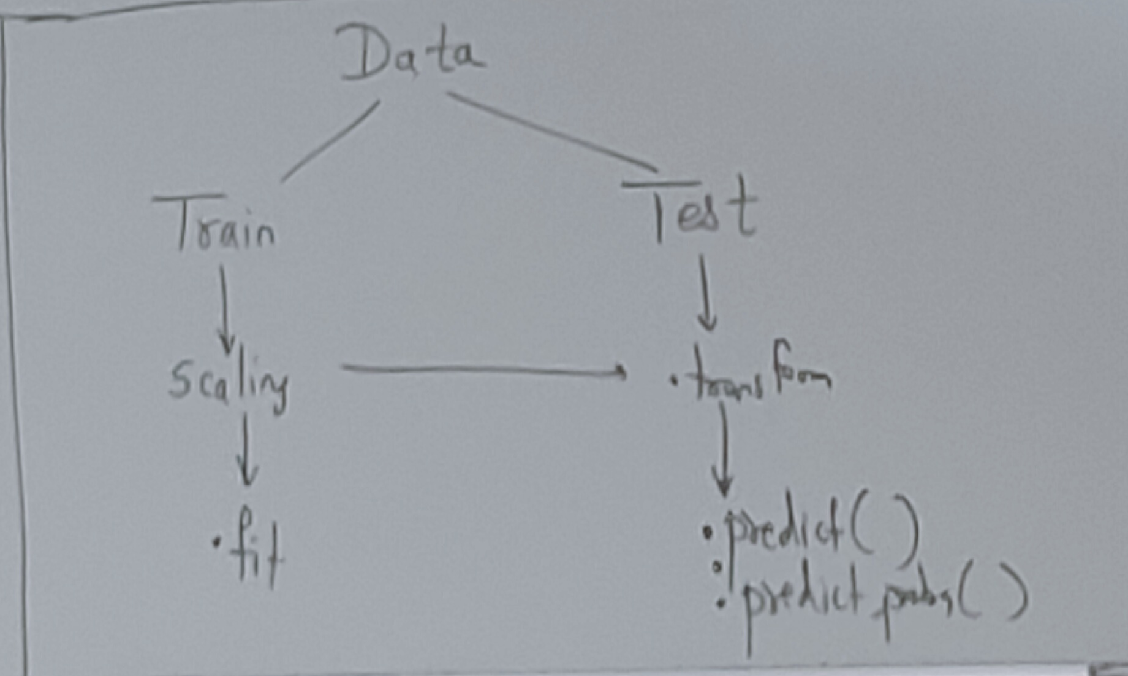

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler

In [3]:
mowers = pd.read_csv("RidingMowers.csv")
dum_mow = pd.get_dummies(mowers, drop_first=True)
X = dum_mow.drop('Response_Not Bought', axis=1)
y = dum_mow['Response_Not Bought']

In [4]:
X, y

(     Income  Lot_Size
 0        34        26
 1        34        40
 2        34        46
 3        34        48
 4        34        53
 ..      ...       ...
 175      86       121
 176      87       109
 177      88       119
 178      89       110
 179      89       124
 
 [180 rows x 2 columns],
 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 175    0
 176    0
 177    0
 178    0
 179    0
 Name: Response_Not Bought, Length: 180, dtype: uint8)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=2023,
                                                    test_size=0.3)

In [6]:
knn = KNeighborsClassifier(n_neighbors=3)
scaler=StandardScaler()
X_scl_train=scaler.fit_transform(X_train)
knn.fit(X_scl_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
X_scl_test=scaler.transform(X_test)
y_pred = knn.predict(X_scl_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[21  1]
 [ 1 31]]
0.9629629629629629
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       0.97      0.97      0.97        32

    accuracy                           0.96        54
   macro avg       0.96      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



In [8]:
### Predicted Probabilities
y_pred_prob = knn.predict_proba(X_scl_test)[:,1]

fpr, tpr, thres = roc_curve(y_test, 
                            y_pred_prob)

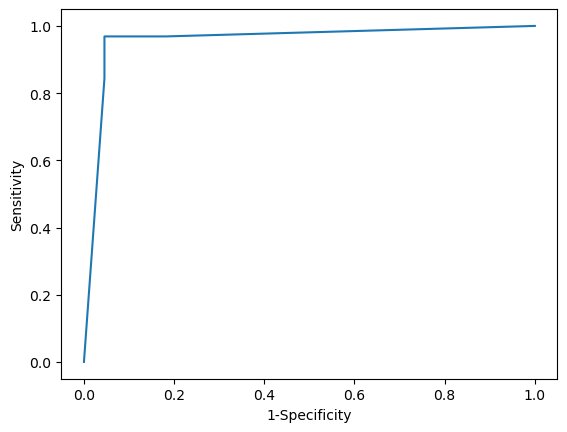

0.9566761363636362
1.3317890397038656


In [9]:
plt.plot(fpr, tpr)
plt.xlabel("1-Specificity")
plt.ylabel("Sensitivity")
plt.show()

print(roc_auc_score(y_test, y_pred_prob))
print(log_loss(y_test, y_pred_prob))

## PIPELINES ##

In [10]:
from sklearn.pipeline import Pipeline
knn = KNeighborsClassifier(n_neighbors=3)
scaler=StandardScaler()
pipe=Pipeline([('STD',scaler),('KNN',knn)])

In [11]:
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

In [12]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[21  1]
 [ 1 31]]
0.9629629629629629
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       0.97      0.97      0.97        32

    accuracy                           0.96        54
   macro avg       0.96      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



In [13]:
y_pred_prob = pipe.predict_proba(X_test)[:,1]

fpr, tpr, thres = roc_curve(y_test, 
                            y_pred_prob)

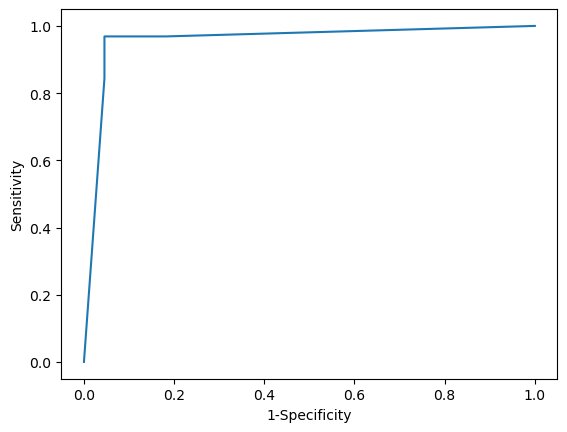

0.9566761363636362
1.3317890397038656


In [14]:
plt.plot(fpr, tpr)
plt.xlabel("1-Specificity")
plt.ylabel("Sensitivity")
plt.show()

print(roc_auc_score(y_test, y_pred_prob))
print(log_loss(y_test, y_pred_prob))

## Cases ##

### Bankruptcy ###

In [41]:
bank = pd.read_csv("Bankruptcy/Bankruptcy.csv")
bank

,NO,D,YR,R1,R2,R3,R4,R5,R6,R7,...,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
0,1,0,78,0.23,0.08,0.02,0.03,0.46,0.12,0.19,...,0.05,0.57,0.15,0.23,3.56,0.26,1.55,0.43,0.11,0.17
1,2,0,77,0.19,0.07,0.09,0.12,0.02,0.02,0.03,...,0.09,0.12,0.16,0.22,3.78,1.29,1.40,0.06,0.07,0.10
2,3,0,72,0.07,0.02,0.03,0.05,0.06,0.10,0.14,...,-0.03,0.02,0.02,0.04,13.29,1.61,1.43,0.03,0.05,0.07
3,4,0,80,0.07,0.03,0.04,0.04,0.04,0.06,0.06,...,-0.02,0.01,0.02,0.02,5.36,1.30,1.12,-0.06,-0.08,-0.09
4,5,0,81,0.09,0.02,0.03,0.04,0.06,0.08,0.11,...,0.02,0.07,0.10,0.14,7.74,1.48,1.41,0.03,0.04,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,128,1,77,0.27,0.03,0.07,0.10,0.09,0.18,0.26,...,0.11,0.06,0.12,0.17,7.56,2.07,1.45,0.06,0.13,0.19
128,129,1,77,0.32,0.03,0.03,0.09,0.05,0.06,0.16,...,0.17,0.07,0.09,0.26,5.99,1.27,2.74,0.06,0.08,0.21
129,130,1,78,0.08,0.01,0.02,0.05,0.04,0.07,0.15,...,0.19,0.07,0.12,0.26,7.14,1.89,2.10,0.07,0.12,0.26
130,131,1,78,0.14,0.01,0.05,0.07,0.02,0.09,0.14,...,0.07,0.02,0.10,0.15,170.96,4.55,1.45,0.02,0.10,0.14


In [42]:
X = bank.drop(['NO','D','YR'], axis=1)
y = bank['D']

In [43]:
X, y

(       R1    R2    R3    R4    R5    R6    R7     R8    R9   R10  ...   R15  \
 0    0.23  0.08  0.02  0.03  0.46  0.12  0.19  10.36  1.17  0.40  ...  0.05   
 1    0.19  0.07  0.09  0.12  0.02  0.02  0.03   3.13  1.73  0.60  ...  0.09   
 2    0.07  0.02  0.03  0.05  0.06  0.10  0.14   2.41  1.36  0.41  ... -0.03   
 3    0.07  0.03  0.04  0.04  0.04  0.06  0.06   5.55  1.13  0.44  ... -0.02   
 4    0.09  0.02  0.03  0.04  0.06  0.08  0.11   2.85  1.88  0.42  ...  0.02   
 ..    ...   ...   ...   ...   ...   ...   ...    ...   ...   ...  ...   ...   
 127  0.27  0.03  0.07  0.10  0.09  0.18  0.26   7.58  2.24  0.28  ...  0.11   
 128  0.32  0.03  0.03  0.09  0.05  0.06  0.16   3.24  5.44  0.46  ...  0.17   
 129  0.08  0.01  0.02  0.05  0.04  0.07  0.15   3.82  2.41  0.37  ...  0.19   
 130  0.14  0.01  0.05  0.07  0.02  0.09  0.14   8.18  1.57  0.11  ...  0.07   
 131  0.26  0.07  0.12  0.17  0.00  0.01  0.01   6.13  1.57  0.39  ...  0.05   
 
       R16   R17   R18     R19   R20  

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=2023,
                                                    test_size=0.3)

In [45]:
knn = KNeighborsClassifier(n_neighbors=9)
scaler=StandardScaler()
pipe=Pipeline([('STD',scaler),('KNN',knn)])

In [46]:
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

In [47]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18  2]
 [ 3 17]]
0.875
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       0.89      0.85      0.87        20

    accuracy                           0.88        40
   macro avg       0.88      0.88      0.87        40
weighted avg       0.88      0.88      0.87        40



In [48]:
y_pred_prob = pipe.predict_proba(X_test)[:,1]

fpr, tpr, thres = roc_curve(y_test, 
                            y_pred_prob)

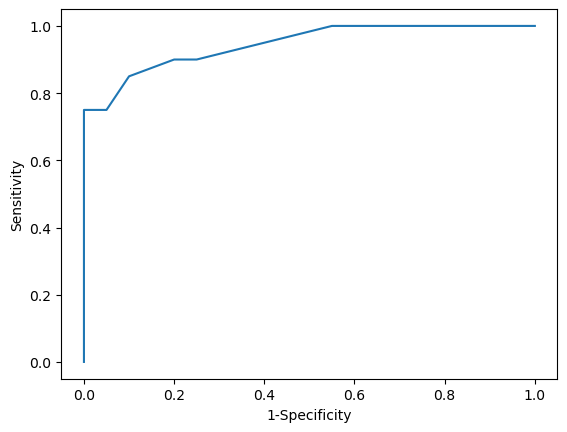

0.945
0.2918396266295263


In [49]:
plt.plot(fpr, tpr)
plt.xlabel("1-Specificity")
plt.ylabel("Sensitivity")
plt.show()

print(roc_auc_score(y_test, y_pred_prob))
print(log_loss(y_test, y_pred_prob))

Loo

In [51]:
maxr=-999
maxi=0
for i in range(1,15,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    scaler=StandardScaler()
    pipe=Pipeline([('STD',scaler),('KNN',knn)])
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    y_pred_prob = pipe.predict_proba(X_test)[:,1]
    roc=roc_auc_score(y_test, y_pred_prob)
    print("K-Value :: ",i)
    print("ROC Value :: ",roc)
    if (maxr<roc):
        maxr=roc
        maxi=i
print("\nBest K Value :: "+str(maxi)+"::"+str(maxr))        

K-Value ::  1
ROC Value ::  0.85
K-Value ::  3
ROC Value ::  0.89
K-Value ::  5
ROC Value ::  0.9175
K-Value ::  7
ROC Value ::  0.9224999999999999
K-Value ::  9
ROC Value ::  0.945
K-Value ::  11
ROC Value ::  0.9425
K-Value ::  13
ROC Value ::  0.93625

Best K Value :: 9::0.945


By using a dictionary ::

In [ ]:
dict1={}
for i in range(1,15,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    scaler=StandardScaler()
    pipe=Pipeline([('STD',scaler),('KNN',knn)])
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    y_pred_prob = pipe.predict_proba(X_test)[:,1]
    dict1[i]=roc_auc_score(y_test, y_pred_prob) 
dict1=dict(sorted(dict1.items(), key=lambda x: -x[1]))   
print(dict1)
#print(list(dict1.items())[0]) #to fetch the first value :: key,value pair with best ROC

In [ ]:
pd.DataFrame(dict1.items(),columns=['K-Value','Roc-Auc Value'])

### Wisconsin Cancer ###

In [53]:
cancer = pd.read_csv("Wisconsin/BreastCancer.csv")
cancer

,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
0,61634,5,4,3,1,2,2,2,3,1,Benign
1,63375,9,1,2,6,4,10,7,7,2,Malignant
2,76389,10,4,7,2,2,8,6,1,1,Malignant
3,95719,6,10,10,10,8,10,7,10,7,Malignant
4,128059,1,1,1,1,2,5,5,1,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...
694,1369821,10,10,10,10,5,10,10,10,7,Malignant
695,1371026,5,10,10,10,4,10,5,6,3,Malignant
696,1371920,5,1,1,1,2,1,3,2,1,Benign
697,8233704,4,1,1,1,1,1,2,1,1,Benign


In [54]:
wis_dum = pd.get_dummies(cancer, drop_first=True)
wis_dum

,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class_Malignant
0,61634,5,4,3,1,2,2,2,3,1,0
1,63375,9,1,2,6,4,10,7,7,2,1
2,76389,10,4,7,2,2,8,6,1,1,1
3,95719,6,10,10,10,8,10,7,10,7,1
4,128059,1,1,1,1,2,5,5,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,1369821,10,10,10,10,5,10,10,10,7,1
695,1371026,5,10,10,10,4,10,5,6,3,1
696,1371920,5,1,1,1,2,1,3,2,1,0
697,8233704,4,1,1,1,1,1,2,1,1,0


In [55]:
X = wis_dum.drop(['Class_Malignant','Code'], axis=1)
y = wis_dum['Class_Malignant']
X,y

(     Clump  UniCell_Size  Uni_CellShape  MargAdh  SEpith  BareN  BChromatin  \
 0        5             4              3        1       2      2           2   
 1        9             1              2        6       4     10           7   
 2       10             4              7        2       2      8           6   
 3        6            10             10       10       8     10           7   
 4        1             1              1        1       2      5           5   
 ..     ...           ...            ...      ...     ...    ...         ...   
 694     10            10             10       10       5     10          10   
 695      5            10             10       10       4     10           5   
 696      5             1              1        1       2      1           3   
 697      4             1              1        1       1      1           2   
 698      1             1              3        1       2      1           2   
 
      NoemN  Mitoses  
 0        3    

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=2023,
                                                    test_size=0.3)

In [57]:
dict1={}
dict2={}
for i in range(1,15,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    scaler=StandardScaler()
    pipe=Pipeline([('STD',scaler),('KNN',knn)])
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    y_pred_prob = pipe.predict_proba(X_test)[:,1]
    dict1[i]=roc_auc_score(y_test, y_pred_prob) 
    dict2[i]=log_loss(y_test, y_pred_prob)
dict1=dict(sorted(dict1.items(), key=lambda x: -x[1]))   
dict2=dict(sorted(dict2.items(), key=lambda x: -x[1]))
print(dict1)

{13: 0.9771537842190016, 11: 0.9737822061191627, 7: 0.9725744766505636, 9: 0.9718196457326892, 5: 0.9657809983896941, 3: 0.9561694847020934, 1: 0.9193840579710144}


In [58]:
df=pd.DataFrame(dict1.items(),columns=['K-Value','Roc-Auc Value'])
df1=pd.DataFrame(dict2.items(),columns=['K-Value','Log Loss Value'])

pd.merge(df,df1,how='inner',on='K-Value')

,K-Value,Roc-Auc Value,Log Loss Value
0,13,0.977154,0.438906
1,11,0.973782,0.592986
2,7,0.972574,0.734562
3,9,0.971820,0.741039
4,5,0.965781,0.888894
5,3,0.956169,1.363178
6,1,0.919384,2.302604


In [39]:
for i in range(1,15,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    scaler=StandardScaler()
    pipe=Pipeline([('KNN',knn)])
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    y_pred_prob = pipe.predict_proba(X_test)[:,1]
    dict1[i]=roc_auc_score(y_test, y_pred_prob) 
    dict2[i]=log_loss(y_test, y_pred_prob)
dict1=dict(sorted(dict1.items(), key=lambda x: -x[1]))   
dict2=dict(sorted(dict2.items(), key=lambda x: x[1]))
print(dict1)

{9: 0.9741344605475041, 11: 0.973329307568438, 5: 0.9731783413848633, 7: 0.9722222222222222, 13: 0.9716686795491144, 3: 0.9665861513687601, 1: 0.908816425120773}


In [52]:
df=pd.DataFrame(dict1.items(),columns=['K-Value','Roc-Auc Value'])
df1=pd.DataFrame(dict2.items(),columns=['K-Value','Log Loss Value'])

pd.merge(df,df1,how='inner',on='K-Value')

,K-Value,Roc-Auc Value,Log Loss Value
0,9,0.974134,0.587567
1,11,0.973329,0.592388
2,5,0.973178,0.728674
3,7,0.972222,0.735871
4,13,0.971669,0.599745
5,3,0.966586,1.036164
6,1,0.908816,2.631549


***

## MULTICLASS ENCODING ##

In case we have more than 2 things in which we can classify the outputs, then its called a **Multi-Class Classification** problem

Hence we use something called ***Label Encoding***

In [2]:
from sklearn.preprocessing import LabelEncoder
pix = pd.read_csv("Image Segmentation/Image_Segmention.csv")
pix.head()

,Class,region.centroid.col,region.centroid.row,region.pixel.count,short.line.density.5,short.line.density.2,vedge.mean,vegde.sd,hedge.mean,hedge.sd,intensity.mean,rawred.mean,rawblue.mean,rawgreen.mean,exred.mean,exblue.mean,exgreen.mean,value.mean,saturation.mean,hue-mean
0,BRICKFACE,188,133,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
1,BRICKFACE,105,139,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
2,BRICKFACE,34,137,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
3,BRICKFACE,39,111,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773
4,BRICKFACE,16,128,9,0.0,0.0,0.500000,0.077778,0.666667,0.311111,5.555555,6.888889,6.666666,3.111111,4.000000,3.333333,-7.333334,7.111111,0.561508,-0.985811


In [3]:
X = pix.drop('Class', axis=1)
y = pix['Class']
X

,region.centroid.col,region.centroid.row,region.pixel.count,short.line.density.5,short.line.density.2,vedge.mean,vegde.sd,hedge.mean,hedge.sd,intensity.mean,rawred.mean,rawblue.mean,rawgreen.mean,exred.mean,exblue.mean,exgreen.mean,value.mean,saturation.mean,hue-mean
0,188,133,9,0.000000,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
1,105,139,9,0.000000,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
2,34,137,9,0.000000,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
3,39,111,9,0.000000,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773
4,16,128,9,0.000000,0.0,0.500000,0.077778,0.666667,0.311111,5.555555,6.888889,6.666666,3.111111,4.000000,3.333333,-7.333334,7.111111,0.561508,-0.985811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,36,243,9,0.111111,0.0,1.888889,1.851851,2.000000,0.711110,13.333333,9.888889,12.111111,18.000000,-10.333333,-3.666667,14.000000,18.000000,0.452229,2.368311
205,186,218,9,0.000000,0.0,1.166667,0.744444,1.166667,0.655555,13.703704,10.666667,12.666667,17.777779,-9.111111,-3.111111,12.222222,17.777779,0.401347,2.382684
206,197,236,9,0.000000,0.0,2.444444,6.829628,3.333333,7.599998,16.074074,13.111111,16.666668,18.444445,-8.888889,1.777778,7.111111,18.555555,0.292729,2.789800
207,208,240,9,0.111111,0.0,1.055556,0.862963,2.444444,5.007407,14.148149,10.888889,13.000000,18.555555,-9.777778,-3.444444,13.222222,18.555555,0.421621,2.392487


In [4]:
label=LabelEncoder()
le_y=label.fit_transform(y)
le_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, le_y, stratify=le_y,
                                                    random_state=2023,
                                                    test_size=0.3)

In [10]:
dict2={}
for i in range(1,15,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    scaler=StandardScaler()
    pipe=Pipeline([('STD',scaler),('KNN',knn)])
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    y_pred_prob = pipe.predict_proba(X_test)
    dict2[i]=log_loss(y_test, y_pred_prob)   
dict2=dict(sorted(dict2.items(), key=lambda x: x[1]))
print(dict2)

{9: 1.5360478481534563, 11: 1.5362251537059641, 13: 1.5721249945131621, 7: 2.0640743874239447, 5: 2.546167684639261, 3: 3.6108509411539185, 1: 7.4375792707702075}


In [11]:
df1=pd.DataFrame(dict2.items(),columns=['K-Value','Log Loss Value'])
df1

,K-Value,Log Loss Value
0,9,1.536048
1,11,1.536225
2,13,1.572125
3,7,2.064074
4,5,2.546168
5,3,3.610851
6,1,7.437579


## K-Nearest Neighbours Regression ##

### Housing Data ###

In this we are not classifying, but we are predicting a value using regression. SO we can have even values since there is no tie.

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
house = pd.read_csv("Housing.csv")
house.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [22]:
X = house.drop('price', axis=1)
y = house['price']
X

,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,5850,3,1,2,yes,no,yes,no,no,1,no
1,4000,2,1,1,yes,no,no,no,no,0,no
2,3060,3,1,1,yes,no,no,no,no,0,no
3,6650,3,1,2,yes,yes,no,no,no,0,no
4,6360,2,1,1,yes,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...
541,4800,3,2,4,yes,yes,no,no,yes,0,no
542,6000,3,2,4,yes,no,no,no,yes,0,no
543,6000,3,2,4,yes,yes,no,no,yes,1,no
544,6000,3,2,2,yes,yes,no,no,yes,1,no


In [23]:
dum_X=pd.get_dummies(X, drop_first=True)
dum_X

,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
0,5850,3,1,2,1,1,0,1,0,0,0
1,4000,2,1,1,0,1,0,0,0,0,0
2,3060,3,1,1,0,1,0,0,0,0,0
3,6650,3,1,2,0,1,1,0,0,0,0
4,6360,2,1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
541,4800,3,2,4,0,1,1,0,0,1,0
542,6000,3,2,4,0,1,0,0,0,1,0
543,6000,3,2,4,1,1,1,0,0,1,0
544,6000,3,2,2,1,1,1,0,0,1,0


In [30]:
X_train, X_test, y_train, y_test = train_test_split(dum_X, y,
                                                    random_state=2023,
                                                    test_size=0.3)

In [40]:
dict3={}
dict1={}
dict2={}
for i in range(1,11):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    dict1[i]=mean_absolute_error(y_test, y_pred) 
    dict2[i]=mean_squared_error(y_test, y_pred)
    dict3[i]=r2_score(y_test, y_pred)
dict1=dict(sorted(dict1.items(), key=lambda x: x[1]))   
dict2=dict(sorted(dict2.items(), key=lambda x: x[1]))
dict3=dict(sorted(dict3.items(), key=lambda x: -x[1]))
print(dict1)
print(dict2)
print(dict3)

# First We solved the problem without using pipeline . so we manuallly done knn.fit 


{5: 17266.002439024393, 6: 17286.353658536584, 7: 17443.229094076654, 4: 17604.83993902439, 9: 17721.7337398374, 8: 17724.103658536584, 10: 17781.490243902437, 3: 18189.878048780487, 2: 18242.295731707316, 1: 18965.628048780487}
{5: 625607728.9004878, 6: 631843052.3275746, 7: 640278841.9259582, 9: 640876265.4306685, 4: 641273979.2503811, 10: 642414794.9210975, 8: 643279951.5154345, 2: 663693805.0137196, 3: 678445009.0298103, 1: 739899804.2012196}
{5: 0.2828438461931493, 6: 0.2756960755372937, 7: 0.26602583307828, 9: 0.2653409854924217, 4: 0.2648850721459509, 10: 0.26357731499907, 8: 0.26258555555145935, 2: 0.23918443695444902, 3: 0.2222746127187536, 1: 0.15182681851459012}


In [41]:
df=pd.DataFrame(dict1.items(),columns=['K-Value','MAS'])
df1=pd.DataFrame(dict2.items(),columns=['K-Value','MSE'])
df2=pd.DataFrame(dict3.items(),columns=['K-Value','R^2'])
mer=pd.merge(df,df1,how='inner',on='K-Value')
pd.merge(mer,df2,how='inner',on='K-Value')

,K-Value,MAS,MSE,R^2
0,5,17266.002439,6.256077e+08,0.282844
1,6,17286.353659,6.318431e+08,0.275696
2,7,17443.229094,6.402788e+08,0.266026
3,4,17604.839939,6.412740e+08,0.264885
4,9,17721.733740,6.408763e+08,0.265341
5,8,17724.103659,6.432800e+08,0.262586
6,10,17781.490244,6.424148e+08,0.263577
7,3,18189.878049,6.784450e+08,0.222275
8,2,18242.295732,6.636938e+08,0.239184
9,1,18965.628049,7.398998e+08,0.151827


In [44]:
dict2={}
for i in range(1,11):
    knn = KNeighborsRegressor(n_neighbors=i)
    scaler=StandardScaler()
    pipe=Pipeline([('STD',scaler),('KNN',knn)])  # createting the object if Pipeline
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    dict1[i]=mean_absolute_error(y_test, y_pred) 
    dict2[i]=mean_squared_error(y_test, y_pred)
    dict3[i]=r2_score(y_test, y_pred)   
dict1=dict(sorted(dict1.items(), key=lambda x: x[1]))   
dict2=dict(sorted(dict2.items(), key=lambda x: x[1]))
dict3=dict(sorted(dict3.items(), key=lambda x: -x[1]))
print(dict1)
print(dict2)
print(dict3)

# Used the pipeline

{3: 11969.27642276423, 4: 12193.059451219513, 10: 12270.274390243903, 9: 12318.353658536585, 8: 12362.977896341463, 5: 12367.884146341463, 7: 12492.665505226481, 6: 12544.786585365855, 2: 13820.82012195122, 1: 15046.774390243903}
{3: 288714982.6165312, 4: 309685284.44397867, 6: 310928988.8753388, 5: 312542351.35243905, 8: 312551965.74018675, 10: 312837719.72548777, 7: 314368749.3989547, 9: 314403670.8444745, 2: 382924361.6112805, 1: 481556150.93292683}
{3: 0.6690358559930478, 4: 0.6449968610957627, 6: 0.6435711589420596, 5: 0.6417217047628296, 8: 0.6417106834518391, 10: 0.6413831136032477, 7: 0.6396280404139868, 9: 0.6395880087321557, 2: 0.5610403297690534, 1: 0.44797523896955826}


In [45]:
df=pd.DataFrame(dict1.items(),columns=['K-Value','MAS'])
df1=pd.DataFrame(dict2.items(),columns=['K-Value','MSE'])
df2=pd.DataFrame(dict3.items(),columns=['K-Value','R^2'])
mer=pd.merge(df,df1,how='inner',on='K-Value')
pd.merge(mer,df2,how='inner',on='K-Value')

,K-Value,MAS,MSE,R^2
0,3,11969.276423,2.887150e+08,0.669036
1,4,12193.059451,3.096853e+08,0.644997
2,10,12270.274390,3.128377e+08,0.641383
3,9,12318.353659,3.144037e+08,0.639588
4,8,12362.977896,3.125520e+08,0.641711
5,5,12367.884146,3.125424e+08,0.641722
6,7,12492.665505,3.143687e+08,0.639628
7,6,12544.786585,3.109290e+08,0.643571
8,2,13820.820122,3.829244e+08,0.561040
9,1,15046.774390,4.815562e+08,0.447975


### Salaries ###

In [65]:
sal = pd.read_csv("Exp_Salaries.csv")
sal.head()

,Salary,Years_Previous_Experience,Years_Employed,Years_Education,Gender,Department,Number_Supervised
0,32782,1,0,7,Male,A,0
1,32920,3,15,9,Female,A,4
2,29548,6,5,1,Male,A,0
3,39828,6,18,5,Female,A,5
4,31528,11,3,3,Male,A,6


In [66]:
X = sal.drop('Salary', axis=1)
y = sal['Salary']
X.head()

,Years_Previous_Experience,Years_Employed,Years_Education,Gender,Department,Number_Supervised
0,1,0,7,Male,A,0
1,3,15,9,Female,A,4
2,6,5,1,Male,A,0
3,6,18,5,Female,A,5
4,11,3,3,Male,A,6


In [67]:
dum_X=pd.get_dummies(X, drop_first=True)
dum_X.head()

# drop_first=True : column Gender_Female and DEpartment_A will be dropped that not causing any loss of data
# we can use get_dummies as label_ecoder used onlu when our dependat variable 'Y' having more than two category

,Years_Previous_Experience,Years_Employed,Years_Education,Number_Supervised,Gender_Male,Department_B,Department_C,Department_D
0,1,0,7,0,1,0,0,0
1,3,15,9,4,0,0,0,0
2,6,5,1,0,1,0,0,0
3,6,18,5,5,0,0,0,0
4,11,3,3,6,1,0,0,0


In [68]:
dum_X.head()

,Years_Previous_Experience,Years_Employed,Years_Education,Number_Supervised,Gender_Male,Department_B,Department_C,Department_D
0,1,0,7,0,1,0,0,0
1,3,15,9,4,0,0,0,0
2,6,5,1,0,1,0,0,0
3,6,18,5,5,0,0,0,0
4,11,3,3,6,1,0,0,0


In [69]:
X_train, X_test, y_train, y_test = train_test_split(dum_X, y,
                                                    random_state=2023,
                                                    test_size=0.3)

In [70]:
dict1={}
dict3={}
dict2={}
for i in range(1,11):
    knn = KNeighborsRegressor(n_neighbors=i)
    scaler=StandardScaler()
    pipe=Pipeline([('STD',scaler),('KNN',knn)])
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    dict1[i]=mean_absolute_error(y_test, y_pred) 
    dict2[i]=mean_squared_error(y_test, y_pred)
    dict3[i]=r2_score(y_test, y_pred)   
dict1=dict(sorted(dict1.items(), key=lambda x: x[1]))   
dict2=dict(sorted(dict2.items(), key=lambda x: x[1]))
dict3=dict(sorted(dict3.items(), key=lambda x: -x[1]))
print(dict1)
print(dict2)
print(dict3)

{2: 6176.642857142857, 4: 6612.625, 3: 6877.333333333335, 9: 7347.238095238096, 10: 7509.271428571427, 8: 7604.339285714285, 7: 7607.673469387756, 5: 7624.5142857142855, 6: 7773.869047619049, 1: 8147.285714285715}
{2: 62564670.10714286, 3: 72780213.65079364, 4: 76754246.62053572, 9: 86453109.92768958, 10: 91069873.97857143, 5: 92439715.6057143, 6: 93815705.7202381, 7: 93859852.74927112, 8: 96234573.45982143, 1: 108275384.71428572}
{2: 0.5596200697046478, 3: 0.4877149458387672, 4: 0.4597425396994972, 9: 0.39147422245537034, 10: 0.35897776355235567, 5: 0.34933572821126346, 6: 0.3396504149236944, 7: 0.3393396730060113, 8: 0.32262449910367685, 1: 0.23787168874185738}


In [71]:
df=pd.DataFrame(dict1.items(),columns=['K-Value','MAS'])
df1=pd.DataFrame(dict2.items(),columns=['K-Value','MSE'])
df2=pd.DataFrame(dict3.items(),columns=['K-Value','R^2'])
mer=pd.merge(df,df1,how='inner',on='K-Value')
pd.merge(mer,df2,how='inner',on='K-Value')

,K-Value,MAS,MSE,R^2
0,2,6176.642857,6.256467e+07,0.559620
1,4,6612.625000,7.675425e+07,0.459743
2,3,6877.333333,7.278021e+07,0.487715
3,9,7347.238095,8.645311e+07,0.391474
4,10,7509.271429,9.106987e+07,0.358978
5,8,7604.339286,9.623457e+07,0.322624
6,7,7607.673469,9.385985e+07,0.339340
7,5,7624.514286,9.243972e+07,0.349336
8,6,7773.869048,9.381571e+07,0.339650
9,1,8147.285714,1.082754e+08,0.237872


## K-Folds Cross-Validation ##

We split data into folds, and each fold is allowed as Train and Test so that all of the data can participate in the training process. If no of observations are less, take less no of folds, for our examples we will be using 5

Life cycle of K-Fold Cross-Validation ::

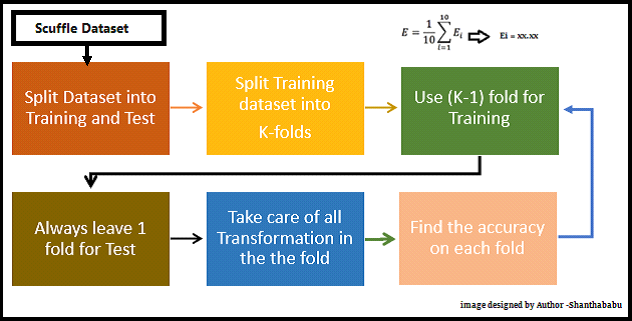




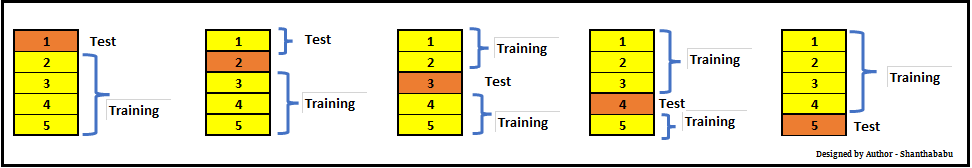





Let’s have a generalised K value. If K=5, it means, in the given dataset and we are splitting into 5 folds and running the Train and Test. During each run, one fold is considered for testing and the rest will be for training and moving on with iterations, the below pictorial representation would give you an idea of the flow of the fold-defined size.

In [6]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [5]:
import pandas as pd

We will use the previously used ***Banking*** Dataset

In [11]:
bank = pd.read_csv("Bankruptcy.csv")
bank

,NO,D,YR,R1,R2,R3,R4,R5,R6,R7,...,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
0,1,0,78,0.23,0.08,0.02,0.03,0.46,0.12,0.19,...,0.05,0.57,0.15,0.23,3.56,0.26,1.55,0.43,0.11,0.17
1,2,0,77,0.19,0.07,0.09,0.12,0.02,0.02,0.03,...,0.09,0.12,0.16,0.22,3.78,1.29,1.40,0.06,0.07,0.10
2,3,0,72,0.07,0.02,0.03,0.05,0.06,0.10,0.14,...,-0.03,0.02,0.02,0.04,13.29,1.61,1.43,0.03,0.05,0.07
3,4,0,80,0.07,0.03,0.04,0.04,0.04,0.06,0.06,...,-0.02,0.01,0.02,0.02,5.36,1.30,1.12,-0.06,-0.08,-0.09
4,5,0,81,0.09,0.02,0.03,0.04,0.06,0.08,0.11,...,0.02,0.07,0.10,0.14,7.74,1.48,1.41,0.03,0.04,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,128,1,77,0.27,0.03,0.07,0.10,0.09,0.18,0.26,...,0.11,0.06,0.12,0.17,7.56,2.07,1.45,0.06,0.13,0.19
128,129,1,77,0.32,0.03,0.03,0.09,0.05,0.06,0.16,...,0.17,0.07,0.09,0.26,5.99,1.27,2.74,0.06,0.08,0.21
129,130,1,78,0.08,0.01,0.02,0.05,0.04,0.07,0.15,...,0.19,0.07,0.12,0.26,7.14,1.89,2.10,0.07,0.12,0.26
130,131,1,78,0.14,0.01,0.05,0.07,0.02,0.09,0.14,...,0.07,0.02,0.10,0.15,170.96,4.55,1.45,0.02,0.10,0.14


In [12]:
X = bank.drop(['NO','D','YR'], axis=1)
y = bank['D']

In [16]:
from sklearn.pipeline import Pipeline

In [17]:
knn=KNeighborsClassifier(n_neighbors=5)
scaler=StandardScaler()
pipe=Pipeline([('STD',scaler),('KNN',knn)])
kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)

Cross Val Score uses Accuracy Score as a metric as default we can use the 'scoring' option to specify what test to use, we will be using roc_auc
Cross Val Score gives us our model metrics directly without needing to use the specific class and then manually fitting and transforming the data to give us our results

In [18]:
import numpy as np

In [19]:
n=np.array(cross_val_score(pipe,X,y,cv=kfold,scoring='roc_auc'))

In [20]:
n.mean()

# as Kfold method tell us we took roc_auc for five split and finaaly to take mean of all those split 

0.8445477599323754

In [21]:
dict1={}
for i in range(1,21,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    scaler=StandardScaler()
    pipe=Pipeline([('STD',scaler),('KNN',knn)])
    kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
    n=np.array(cross_val_score(pipe,X,y,cv=kfold,scoring='roc_auc'))
    dict1[i]=n.mean()
dict1=dict(sorted(dict1.items(), key=lambda x: -x[1]))   
print(dict1)

{19: 0.8865173288250212, 17: 0.8772189349112425, 15: 0.8662721893491124, 13: 0.8613271344040575, 9: 0.8572696534234996, 11: 0.8571428571428571, 7: 0.8458579881656805, 5: 0.8445477599323754, 3: 0.8355452240067626, 1: 0.7126373626373625}


In [22]:
df=pd.DataFrame(dict1.items(),columns=['K-Value','Roc Auc'])
df


,K-Value,Roc Auc
0,19,0.886517
1,17,0.877219
2,15,0.866272
3,13,0.861327
4,9,0.857270
5,11,0.857143
6,7,0.845858
7,5,0.844548
8,3,0.835545
9,1,0.712637


## HYPERPARAMETER TUNING ###

A Machine Learning model is defined as a mathematical model with a number of parameters that need to be learned from the data. By training a model with existing data, we are able to fit the model parameters. 
However, there is another kind of parameter, known as Hyperparameters, that cannot be directly learned from the regular training process. They are usually fixed before the actual training process begins. These parameters express important properties of the model such as its complexity or how fast it should learn. 

    
GridSearchCV 
In GridSearchCV approach, the machine learning model is evaluated for a range of hyperparameter values. This approach is called GridSearchCV, because it searches for the best set of hyperparameters from a grid of hyperparameters values. 


For example, if we want to set two hyperparameters C and Alpha of the Logistic Regression Classifier model, with different sets of values. The grid search technique will construct many versions of the model with all possible combinations of hyperparameters and will return the best one. 

As in the image, for C = [0.1, 0.2, 0.3, 0.4, 0.5] and Alpha = [0.1, 0.2, 0.3, 0.4]. For a combination of C=0.3 and Alpha=0.2, the performance score comes out to be 0.726(Highest), therefore it is selected. 


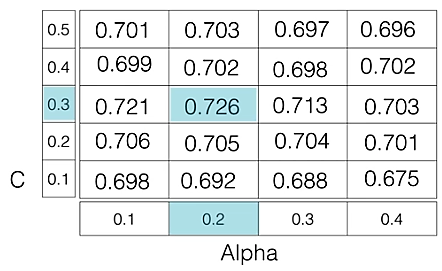
   
   
Drawback: GridSearchCV will go through all the intermediate combinations of hyperparameters which makes grid search computationally very expensive.  


### Grid Search ###

GridSearchCV¶

Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a “fit” and a “score” method. It also implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

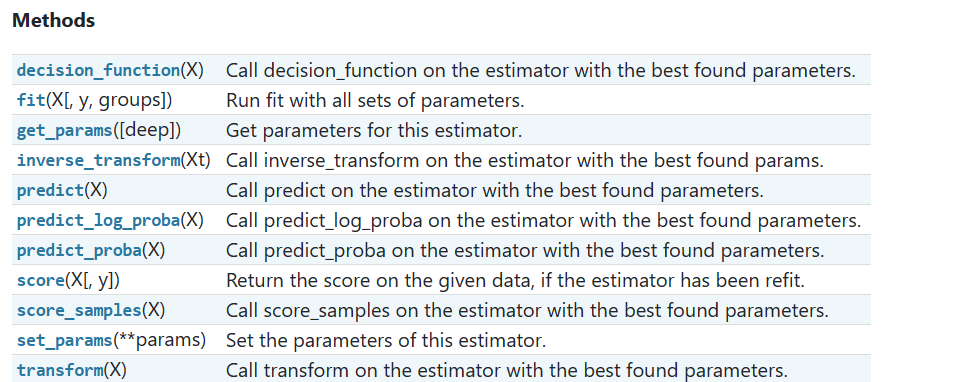






## SYNTAX :# gridSerachcv(data, cv: split method ,  param_grid:range  ,  scorring: method )


In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
params={'n_neighbors':np.arange(1,23,2)}


In [112]:
knn = KNeighborsClassifier()
kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
gcv = GridSearchCV(knn, param_grid=params, cv=kfold, scoring='roc_auc')

# IMP : fitting the X,Y column 
gcv.fit(X,y)

print(gcv.best_params_)
print(gcv.best_score_)
pd.DataFrame(gcv.cv_results_)

# gridSearch replace the cross_val_score

{'n_neighbors': 7}
0.7475908706677938


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001398,4.884820e-04,0.053967,1.098589e-03,1,{'n_neighbors': 1},0.782967,0.626374,0.692308,0.576923,0.692308,0.674176,0.069622,11
1,0.001799,3.998757e-04,0.053169,1.165411e-03,3,{'n_neighbors': 3},0.755495,0.750000,0.707101,0.600592,0.745562,0.711750,0.058134,10
2,0.001399,4.894926e-04,0.053769,9.795400e-04,5,{'n_neighbors': 5},0.700549,0.804945,0.689349,0.680473,0.772189,0.729501,0.049736,3
3,0.001599,4.896874e-04,0.053769,9.791896e-04,7,{'n_neighbors': 7},0.763736,0.796703,0.701183,0.742604,0.733728,0.747591,0.031760,1
4,0.001599,4.892980e-04,0.053569,1.495796e-03,9,{'n_neighbors': 9},0.782967,0.741758,0.695266,0.757396,0.748521,0.745182,0.028605,2
5,0.001799,3.996611e-04,0.053969,1.788405e-03,11,{'n_neighbors': 11},0.719780,0.695055,0.745562,0.683432,0.751479,0.719062,0.026831,8
6,0.001999,2.780415e-07,0.053969,4.101908e-07,13,{'n_neighbors': 13},0.670330,0.703297,0.843195,0.653846,0.730769,0.720287,0.066955,6
7,0.001399,4.894148e-04,0.054369,4.895705e-04,15,{'n_neighbors': 15},0.686813,0.708791,0.825444,0.692308,0.721893,0.727050,0.050729,4
8,0.001799,3.997331e-04,0.052969,1.548342e-03,17,{'n_neighbors': 17},0.695055,0.703297,0.795858,0.677515,0.727811,0.719907,0.041284,7
9,0.001599,4.894342e-04,0.054569,4.898240e-04,19,{'n_neighbors': 19},0.703297,0.695055,0.739645,0.704142,0.739645,0.716357,0.019278,9


With Scaling in Pipeline :

In [115]:
params={'KNN__n_neighbors':np.arange(1,23,2)} # Passing dictionary to to grid search .from this grid search will take range  
# We mention KNN__ to enable gridsearch to know where n_neighbors is from

In [116]:
knn = KNeighborsClassifier()
kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
scaler=StandardScaler()
pipe=Pipeline([('STD',scaler),('KNN',knn)])
gcv = GridSearchCV(pipe, param_grid=params, cv=kfold, scoring='roc_auc') 
# Replace knn with pipe object , param_grid : range ,cv :Determines the cross-validation splitting strategy.
# scoring='roc_auc' -> method to check the accuracy 
gcv.fit(X,y)

print(gcv.best_params_)
# best_params is a method whcih gives best N-neighbor 
print(gcv.best_score_)
# best_score_ provide the score of best param 

pd.DataFrame(gcv.cv_results_)

{'KNN__n_neighbors': 19}
0.8865173288250212


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_KNN__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003398,4.898238e-04,0.054169,0.000400,1,{'KNN__n_neighbors': 1},0.667582,0.703297,0.653846,0.653846,0.884615,0.712637,0.087871,11
1,0.003198,4.001142e-04,0.053969,0.001095,3,{'KNN__n_neighbors': 3},0.890110,0.799451,0.834320,0.804734,0.849112,0.835545,0.032909,10
2,0.003398,4.899209e-04,0.053769,0.001469,5,{'KNN__n_neighbors': 5},0.846154,0.835165,0.798817,0.849112,0.893491,0.844548,0.030326,9
3,0.003198,3.994468e-04,0.053769,0.000979,7,{'KNN__n_neighbors': 7},0.846154,0.826923,0.825444,0.816568,0.914201,0.845858,0.035508,8
4,0.003198,3.996611e-04,0.053969,0.000632,9,{'KNN__n_neighbors': 9},0.843407,0.857143,0.884615,0.772189,0.928994,0.857270,0.051620,6
5,0.003198,3.998784e-04,0.053769,0.001166,11,{'KNN__n_neighbors': 11},0.857143,0.851648,0.869822,0.763314,0.943787,0.857143,0.057449,7
6,0.002998,4.422006e-07,0.053969,0.000632,13,{'KNN__n_neighbors': 13},0.857143,0.848901,0.852071,0.819527,0.928994,0.861327,0.036287,5
7,0.003597,4.892979e-04,0.054968,0.000001,15,{'KNN__n_neighbors': 15},0.846154,0.846154,0.866864,0.825444,0.946746,0.866272,0.042315,4
8,0.003398,4.896290e-04,0.054569,0.000489,17,{'KNN__n_neighbors': 17},0.859890,0.851648,0.875740,0.825444,0.973373,0.877219,0.050759,3
9,0.002998,2.611745e-07,0.054369,0.000489,19,{'KNN__n_neighbors': 19},0.868132,0.854396,0.896450,0.825444,0.988166,0.886517,0.055733,1


In [117]:
cancer = pd.read_csv("Wisconsin/BreastCancer.csv")
cancer

,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
0,61634,5,4,3,1,2,2,2,3,1,Benign
1,63375,9,1,2,6,4,10,7,7,2,Malignant
2,76389,10,4,7,2,2,8,6,1,1,Malignant
3,95719,6,10,10,10,8,10,7,10,7,Malignant
4,128059,1,1,1,1,2,5,5,1,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...
694,1369821,10,10,10,10,5,10,10,10,7,Malignant
695,1371026,5,10,10,10,4,10,5,6,3,Malignant
696,1371920,5,1,1,1,2,1,3,2,1,Benign
697,8233704,4,1,1,1,1,1,2,1,1,Benign


In [118]:
wis_dum = pd.get_dummies(cancer, drop_first=True)
wis_dum.head()

,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class_Malignant
0,61634,5,4,3,1,2,2,2,3,1,0
1,63375,9,1,2,6,4,10,7,7,2,1
2,76389,10,4,7,2,2,8,6,1,1,1
3,95719,6,10,10,10,8,10,7,10,7,1
4,128059,1,1,1,1,2,5,5,1,1,0


In [119]:
X = wis_dum.drop(['Class_Malignant','Code'], axis=1)
y = wis_dum['Class_Malignant']
X,y

(     Clump  UniCell_Size  Uni_CellShape  MargAdh  SEpith  BareN  BChromatin  \
 0        5             4              3        1       2      2           2   
 1        9             1              2        6       4     10           7   
 2       10             4              7        2       2      8           6   
 3        6            10             10       10       8     10           7   
 4        1             1              1        1       2      5           5   
 ..     ...           ...            ...      ...     ...    ...         ...   
 694     10            10             10       10       5     10          10   
 695      5            10             10       10       4     10           5   
 696      5             1              1        1       2      1           3   
 697      4             1              1        1       1      1           2   
 698      1             1              3        1       2      1           2   
 
      NoemN  Mitoses  
 0        3    

In [120]:
params={'KNN__n_neighbors':np.arange(1,23,2)}

In [121]:
knn = KNeighborsClassifier()
kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
scaler=StandardScaler()
pipe=Pipeline([('STD',scaler),('KNN',knn)])
gcv = GridSearchCV(pipe, param_grid=params, cv=kfold, scoring='roc_auc') #Replace knn with pipe object
gcv.fit(X,y)

print(gcv.best_params_)
print(gcv.best_score_)
pd.DataFrame(gcv.cv_results_)

{'KNN__n_neighbors': 15}
0.9924931633546873


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_KNN__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004399,4.911704e-04,0.003398,4.893369e-04,1,{'KNN__n_neighbors': 1},0.947464,0.926630,0.942029,0.968603,0.947344,0.946414,0.013453,11
1,0.003798,3.998042e-04,0.003398,4.896483e-04,3,{'KNN__n_neighbors': 3},0.966486,0.987319,0.974977,0.987441,0.976534,0.978551,0.007979,10
2,0.003998,2.336015e-07,0.003198,3.995896e-04,5,{'KNN__n_neighbors': 5},0.970335,0.986753,0.984149,0.991926,0.997138,0.986060,0.009039,9
3,0.003798,3.997088e-04,0.003798,3.998518e-04,7,{'KNN__n_neighbors': 7},0.980186,0.985960,0.989810,0.990469,0.998397,0.988964,0.005967,8
4,0.003999,2.319410e-06,0.003597,4.887381e-04,9,{'KNN__n_neighbors': 9},0.979959,0.995245,0.989583,0.989908,0.997940,0.990527,0.006167,7
5,0.003998,1.784161e-07,0.003598,4.894926e-04,11,{'KNN__n_neighbors': 11},0.980072,0.994905,0.988791,0.993608,0.997940,0.991063,0.006237,6
6,0.003997,1.168008e-07,0.003998,9.536743e-08,13,{'KNN__n_neighbors': 13},0.979506,0.994565,0.995131,0.992263,0.997482,0.991789,0.006362,4
7,0.003799,4.004381e-04,0.003796,4.031659e-04,15,{'KNN__n_neighbors': 15},0.983130,0.995584,0.995358,0.991142,0.997253,0.992493,0.005097,1
8,0.003798,3.998757e-04,0.003798,3.997088e-04,17,{'KNN__n_neighbors': 17},0.982224,0.995131,0.995358,0.990469,0.996795,0.991995,0.005329,2
9,0.003998,4.422006e-07,0.003798,3.995897e-04,19,{'KNN__n_neighbors': 19},0.981318,0.995018,0.996150,0.989572,0.996680,0.991748,0.005795,5
